# Imports

In [1]:
import numpy as np
import random
import pandas
import scipy.io
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Constants

In [2]:
X = 0
Y = 1
WHITE = 0
BLACK = 1
COMPONENTS = [WHITE, BLACK]
NUM_COMPONENTS = len(COMPONENTS)

# Helper Functions

In [3]:
def cov_to_pts( cov ):
    circ = np.linspace( 0, 2*np.pi, 100 )
    sf = np.asarray( [ np.cos( circ ), np.sin( circ ) ] )
    [u,s,v] = np.linalg.svd( cov )
    pmat = u*2.447*np.sqrt(s) # 95% confidence
    return np.dot(  pmat, sf )

def displayPoints():
#     print covs
#     print responsibilities[:10]
    white_points = np.array([xi for xi, wi in zip(data_centered, responsibilities) if wi[WHITE] >= wi[BLACK]])
    black_points = np.array([xi for xi, wi in zip(data_centered, responsibilities) if wi[WHITE] < wi[BLACK]])
#     print white_points
    plt.scatter(white_points[:, X], white_points[:, Y], c='white')
    plt.scatter(black_points[:, X], black_points[:, Y], c='black')
    plt.scatter(mus[X, WHITE], mus[Y, WHITE], s=(np.pi * 50), c='white')
    plt.scatter(mus[X, BLACK], mus[Y, BLACK], s=(np.pi * 50), c='black')
    cov_elipse0 = cov_to_pts(covs[0])
    cov_elipse1 = cov_to_pts(covs[1])
    plt.plot(cov_elipse0[0] + mus[0, 0], cov_elipse0[1] + mus[1, 0])
    plt.plot(cov_elipse1[0] + mus[0, 1], cov_elipse1[1] + mus[1, 1])
    plt.show()

# Get Data

In [4]:
data_mat = scipy.io.loadmat('data/old_faithful.mat')
data = data_mat['data']
# mean center data
mean_x = sum(data[:, X]) / len(data)
mean_y = sum(data[:, Y]) / len(data)
mean = [mean_x, mean_y]
data_centered = np.array(map(lambda x: np.subtract(x, mean).tolist(), data))

# Initial Parameters

In [5]:
# the Gaussian means (as column vectors -- ie, the mean for Gaussian 0 is mus[:,0]
mus = np.asarray( [[-1.17288986, -0.11642103],
                   [-0.16526981,  0.70142713]])
 
# the Gaussian covariance matrices
covs = list()
covs.append( 
    np.asarray([[ 0.74072815,  0.09252716],
                [ 0.09252716,  0.5966275 ]]) )
covs.append( 
    np.asarray([[ 0.39312776, -0.46488887],
                [-0.46488887,  1.64990767]]) )
 
# The Gaussian mixing weights
mws = [ 0.68618439, 0.31381561 ]  # called alpha in the slides

# The responsibilities of each cluster for each data point
responsibilities = np.random.rand(len(data_centered), NUM_COMPONENTS)

# Display dataset

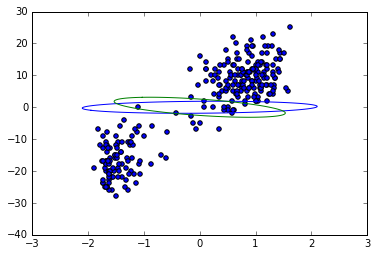

In [6]:
plt.scatter(data_centered[:, X], data_centered[:, Y])
cov_elipse0 = cov_to_pts(covs[0])
cov_elipse1 = cov_to_pts(covs[1])
plt.plot(cov_elipse0[0], cov_elipse0[1])
plt.plot(cov_elipse1[0], cov_elipse1[1])

# Expectation Maximization Algorithm

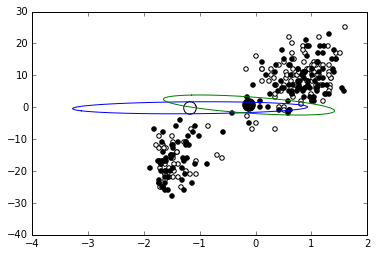

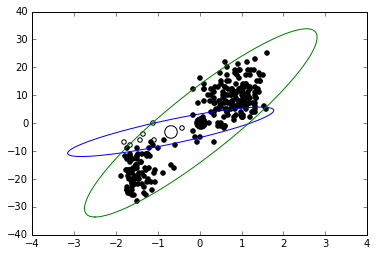

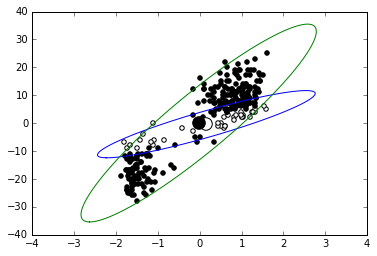

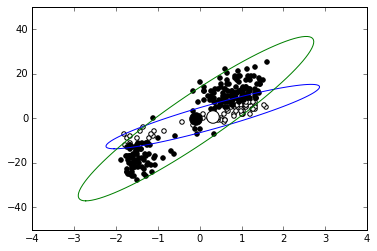

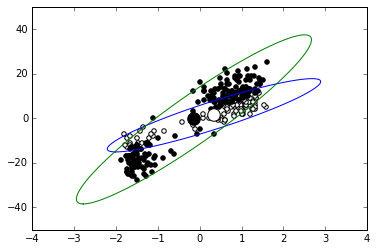

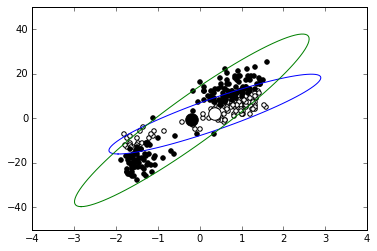

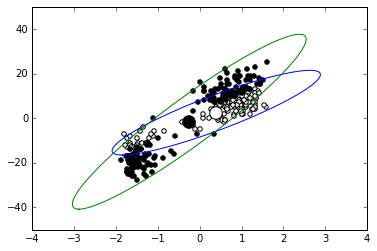

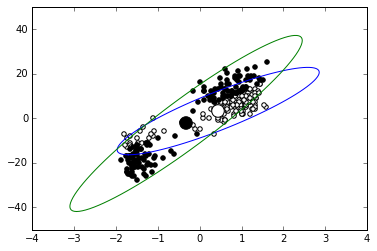

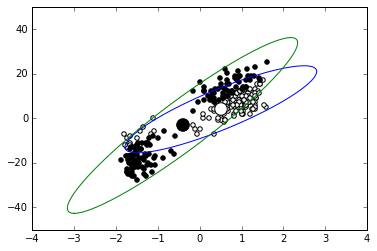

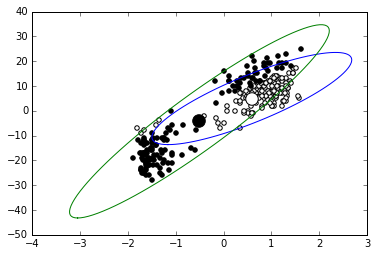

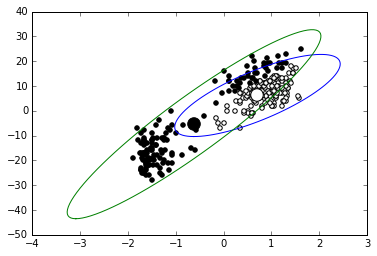

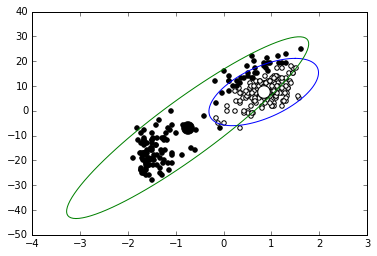

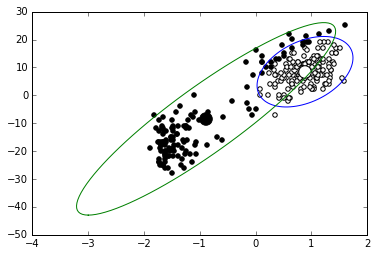

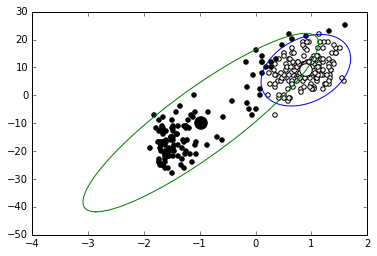

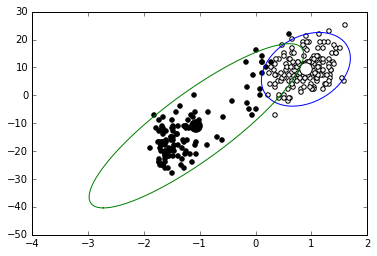

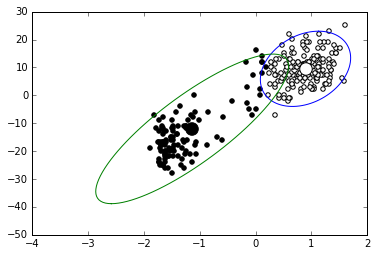

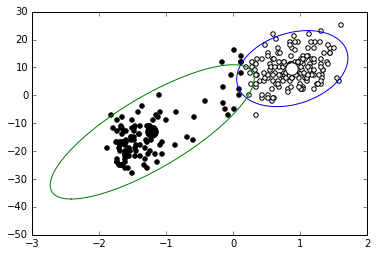

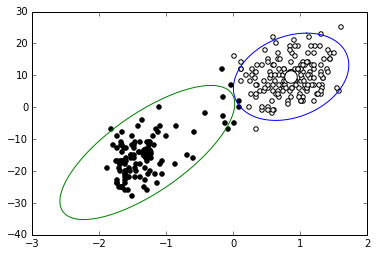

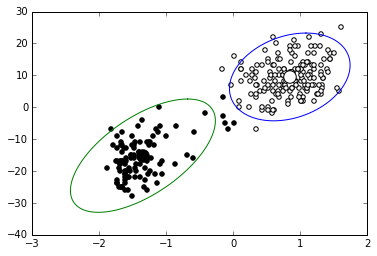

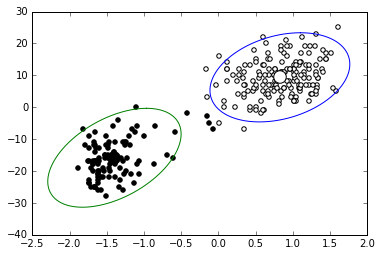

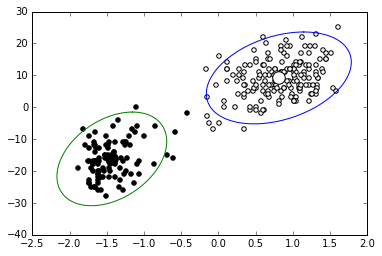

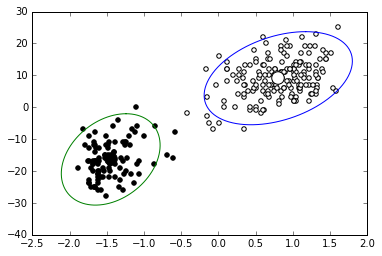

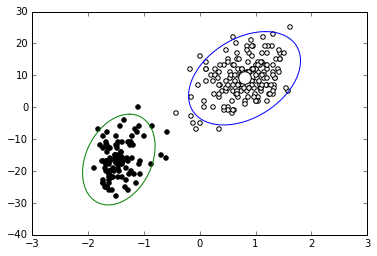

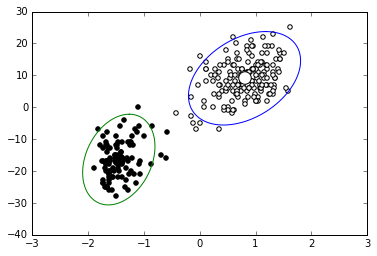

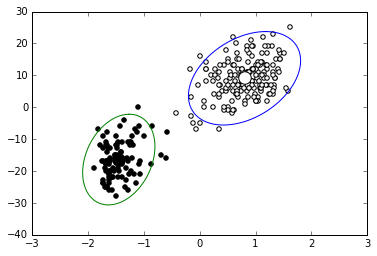

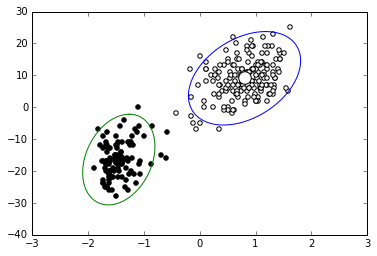

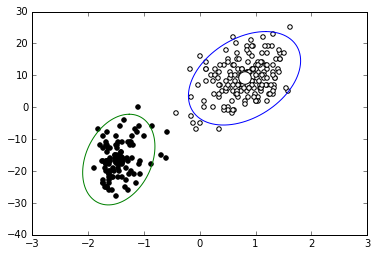

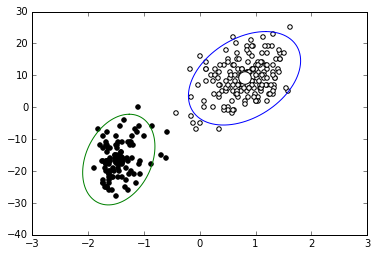

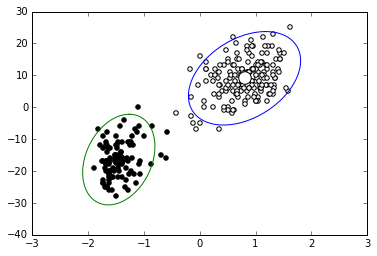

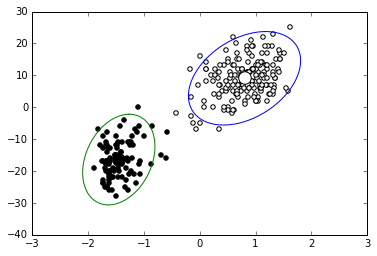

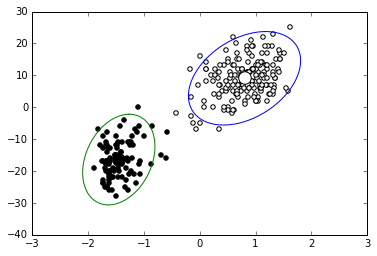

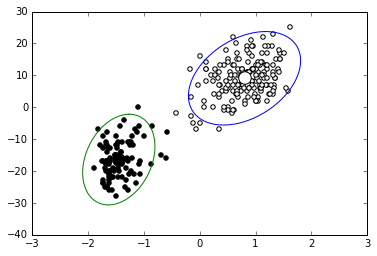

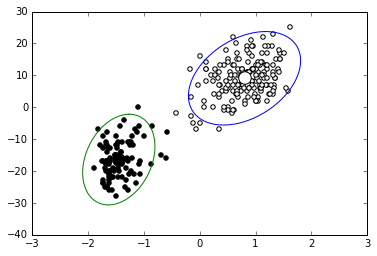

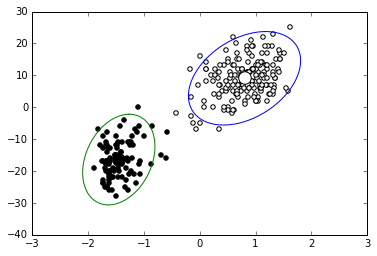

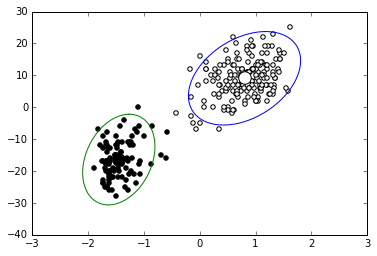

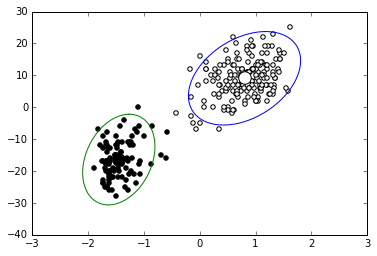

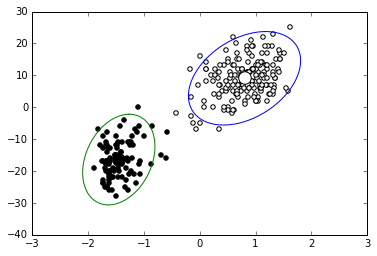

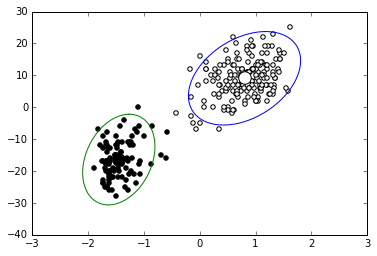

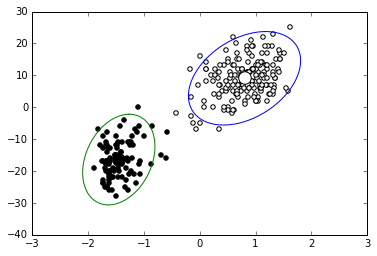

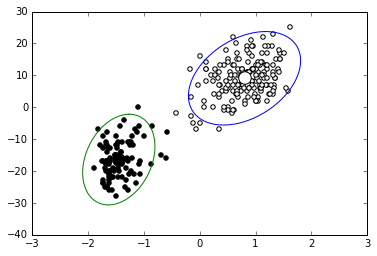

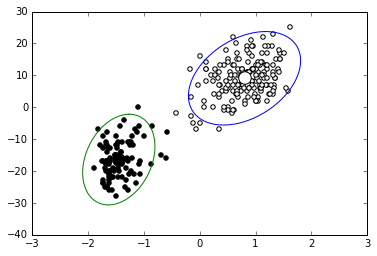

In [7]:
def calcResponsibility(i, xi):
    responsibilities[i] = [scipy.stats.multivariate_normal.pdf(xi, mus[:, ki], covs[ki]) for ki in COMPONENTS]
    sumi = sum(responsibilities[i])
    responsibilities[i] = [a / sumi for a in responsibilities[i]]
    
def calcMu(ki, eff_num_ki):
    ki_prod = np.array([p * q for p, q in zip(data_centered[:], responsibilities[:, ki])])
    ki_sum = [np.sum(ki_prod[:,col]) for col in range(2)]
    new_mu = ki_sum / eff_num_ki
    mus[:,ki] = new_mu    

def EM():
    # 1 -> Estimate responsibilities
    for i, xi in enumerate(data_centered): calcResponsibility(i, xi)        
    # 2 -> Estimate effective number of points
    effective_number = [sum(responsibilities[:, ki]) for ki in COMPONENTS]
    # 3 -> Estimate mixing weights
    mws = [effective_number[ki] / len(data_centered) for ki in COMPONENTS]
    # 4 -> Estimate means
    for ki in COMPONENTS: calcMu(ki, effective_number[ki])
    # 5 -> Estimate covariances
    for ki in COMPONENTS:
        ki_prod = np.array([w_ik * (np.atleast_2d(x_i - mus[:, ki])).T.dot(np.atleast_2d(x_i - mus[:, ki])) 
                            for w_ik, x_i in zip(responsibilities[:, ki], data_centered)])
        ki_sum = sum(ki_prod)
        covs[ki] = ki_sum / effective_number[ki]
        
for _ in range(40):
    displayPoints()
    EM()
displayPoints()